In [72]:
# id:12-12-12-0
# id:12-12-12-0 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("week4_2.csv")
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)
X_poly.shape

   -0.57  -0.46  -1
0   0.98   0.57   1
1  -0.06  -0.60   1
2   0.94   0.31   1
3  -0.88   0.78   1
4   0.24   1.00  -1


(1542, 21)

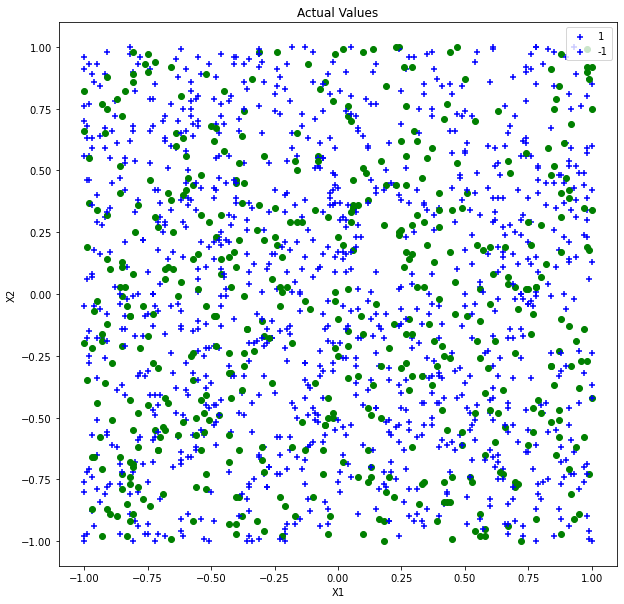

In [73]:
colors = {'1':'blue', '-1': 'green'}
marker = {'1': '+', '-1': 'o'}

plt.figure(figsize=(10,10))
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], color=colors[str(y[i])], marker=marker[str(y[i])])
plt.legend(['1', '-1'], loc='upper right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual Values')
plt.show()

/home/rxshri99/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rxshri99/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

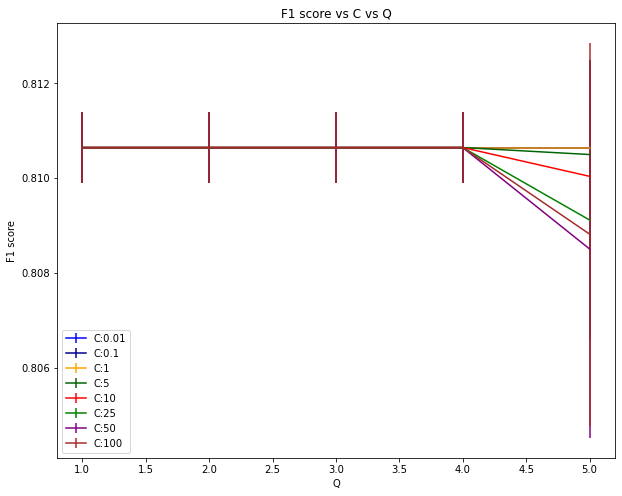

In [74]:
def plot_F1vsCvsQ(C,Q):
    color = {0.01:"blue",
            0.1:"darkblue",
            1:"orange",
            5:"darkgreen",
            10:"red",
            25:"green",
            50:"purple",
            100:"brown"}
    plt.figure(figsize=(10,8))
    for c in C:
        mean_error = []
        std_error = []
        model = LogisticRegression(C=c,penalty="l2")
        for q in Q:
            X_poly = PolynomialFeatures(q).fit_transform(X)
            scores = cross_val_score(model,X_poly,y,scoring="f1")
            mean_error.append(np.array(scores).mean())
            std_error.append(np.array(scores).std())
        plt.errorbar(Q, mean_error, yerr=std_error, color =color[c],label="C:%s"%str(c))
    plt.xlabel('Q')
    plt.ylabel('F1 score')
    plt.title("F1 score vs C vs Q")
    plt.legend()

plot_F1vsCvsQ([0.01, 0.1, 1, 5, 10, 25, 50, 100],[1,2,3,4,5])

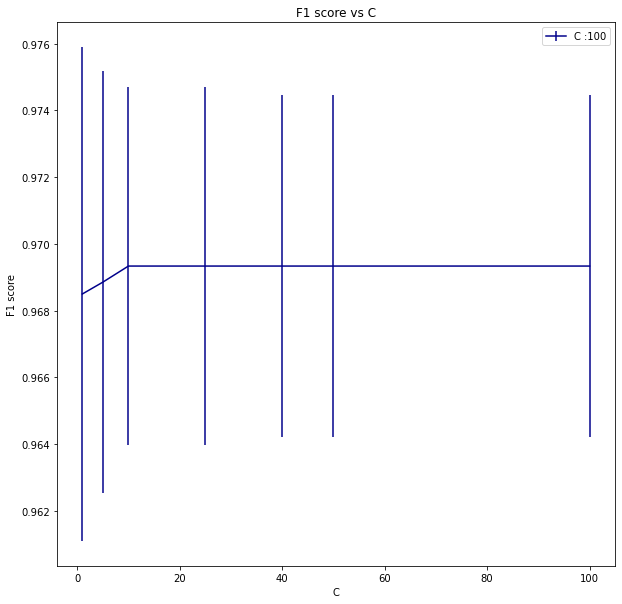

In [49]:
def plot_F1vsC_errorbar(C,q): 
    plt.figure(figsize=(10,10))
    mean_error = []
    std_error = []
    for c in C:
        model = LogisticRegression(C=c,penalty="l2")
        X_poly = PolynomialFeatures(q).fit_transform(X)
        scores = cross_val_score(model,X_poly,y,scoring="f1")
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    plt.errorbar(C, mean_error, yerr=std_error, color ="darkblue",label="C :%s"%str(c))
    plt.xlabel('C')
    plt.ylabel('F1 score')
    plt.title("F1 score vs C")
    plt.legend()

plot_F1vsC_errorbar([1,5,10,25,40,50,100], 2)

In [59]:
c, q = 25, 2

X_poly = PolynomialFeatures(q).fit_transform(X)
lr = LogisticRegression(C=c,penalty="l2")
model = lr.fit(X_poly,y)
Y1 = model.predict(X_poly)

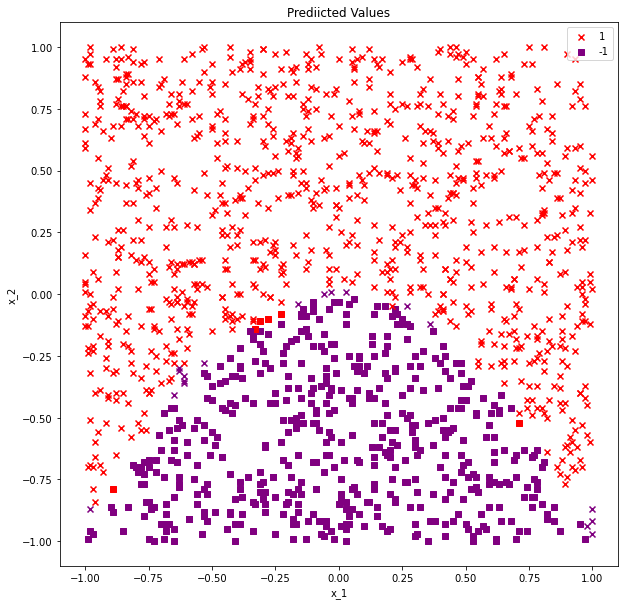

In [60]:
colors1 = {'1':'red', '-1': 'purple'}
marker1 = {'1': 'x', '-1': 's'}

plt.figure(figsize=(10,10))
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], color=colors1[str(Y[i])], marker=marker1[str(Y1[i])])

plt.legend(['1', '-1'], loc='upper right')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Prediicted Values')
plt.show()

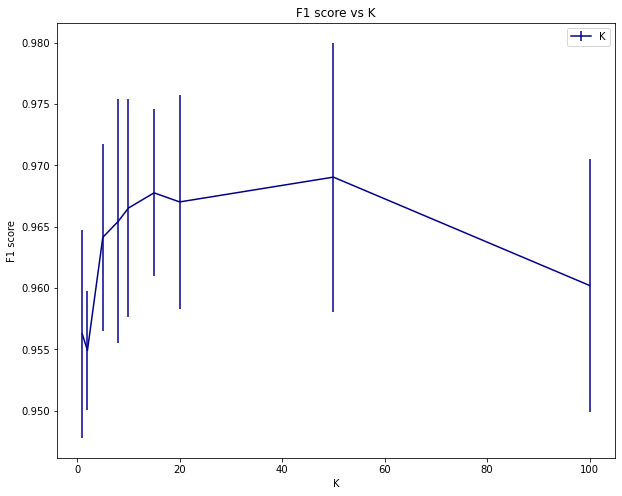

In [50]:
def f1vsK(K):
    plt.figure(figsize=(10,8))
    mean_error = []
    std_error = []
    for i in K:
        model=KNeighborsClassifier(n_neighbors=i,weights='uniform').fit(X, y)
        scores = cross_val_score(model,X,y,scoring="f1")
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    plt.errorbar(K, mean_error, yerr=std_error, color ="darkblue",label ="K")
    plt.xlabel('K')
    plt.ylabel('F1 score')
    plt.title("F1 score vs K")
    plt.legend()
    plt.show()

f1vsK([1,2,5,8,10,15,20,50,100])

In [62]:
knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X,y)
Y2 = model.predict(X)

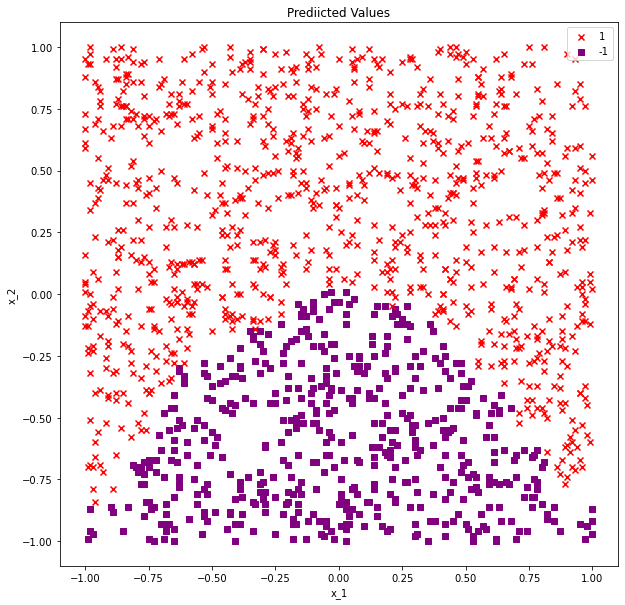

In [63]:
colors1 = {'1':'red', '-1': 'purple'}
marker1 = {'1': 'x', '-1': 's'}

plt.figure(figsize=(10,10))
for i in range(len(X1)):
    plt.scatter(X1[i], X2[i], color=colors1[str(Y[i])], marker=marker1[str(Y2[i])])

plt.legend(['1', '-1'], loc='upper right')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Prediicted Values')
plt.show()

In [66]:
from sklearn.dummy import DummyClassifier

def baseline_predictor(strategy):    
    dummy = DummyClassifier(strategy=strategy).fit(X, y) 
    Y_dummy = dummy.predict(X)
    print(confusion_matrix(Y_dummy,y))
    print(accuracy_score(Y_dummy,y))

In [68]:
print("Logistic Regression Score: {}".format(confusion_matrix(Y1,y)))
print("Logistic Regression Accurracy: {}".format(accuracy_score(Y1,y)))

print("K-Neighbors Classifier Score: {}".format(confusion_matrix(Y2,y)))
print("K-Neighbors Classifier Accurracy: {}".format(accuracy_score(Y2,y)))

baseline_predictor("most_frequent")
baseline_predictor("stratified")

Logistic Regression Score: [[476  30]
 [ 24 935]]
Logistic Regression Accurracy: 0.9631399317406143
K-Neighbors Classifier Score: [[481  37]
 [ 19 928]]
K-Neighbors Classifier Accurracy: 0.9617747440273038
[[  0   0]
 [500 965]]
0.658703071672355
[[182 314]
 [318 651]]
0.5686006825938567


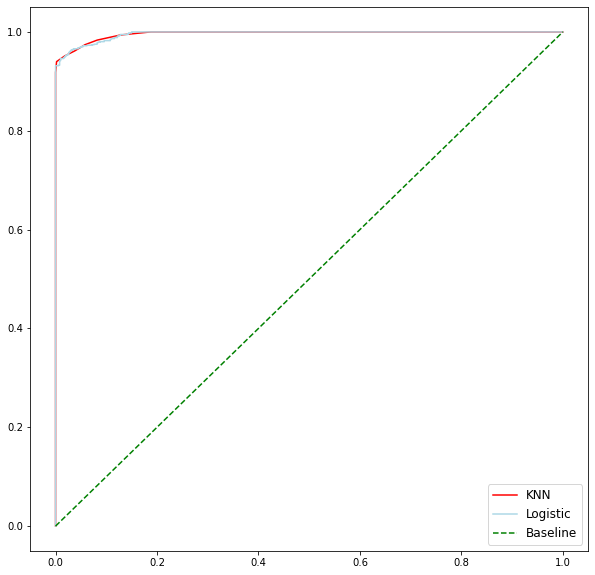

In [71]:
def ROC():
    plt.figure(figsize=(10,10))
    fn1 = lr.decision_function(X_poly)
    prob_pred = knn.predict_proba(X)
    fpr1,tpr1,_1=roc_curve(y, fn1)
    fpr2,tpr2,_2=roc_curve(y, prob_pred[:,1])
    plt.plot(fpr2,tpr2,color="red",label = "KNN")
    plt.plot(fpr1,tpr1,color="lightblue", label = "Logistic")
    plt.plot([0, 1], [0, 1], color='green',linestyle='--', label = "Baseline")
    plt.legend(fontsize=12)

ROC()